# ASO and ATL08: Spatial Extent Comparison

In [3]:
!pip install earthpy

  Using cached earthpy-0.9.2-py3-none-any.whl


In [1]:
#Open, Plot, and Explore Raster Data with Python 
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/open-lidar-raster-python/
#Applied to ASO Snow Off data from Tuolumne Meadows (downloaded from Linux Box Storage)

# Import necessary packages
import os
import rasterio
from rasterio.enums import Resampling
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import numpy.ma as ma
import pandas as pd
import seaborn as sns
from rasterstats import zonal_stats
import statistics
import scipy.stats as stats
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
import rioxarray as riox
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent
from rasterio import features

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

%matplotlib inline

In [2]:
#set working directory?
os.chdir(os.path.join(et.io.HOME, 
                      'ICESat-2_Snowdepth'))

In [3]:
dem_path = os.path.join("data",
                       "mcc_dem_3p0m_agg_TUOtrimmed_MANUAL.tif")
dem_9m_path = os.path.join("data",
                       "mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_9m.tif")

In [4]:
ATL08_path = os.path.join("data/ATL08_simplified/")

In [8]:
# # Proceess and Open Snow-Off Data
# # Open the file using a context manager ("with rio.open" statement)

# with rio.open(dem_path) as dem:
#     dem_arr = dem.read(1)
#     dem_meta = dem.profile
#     dem_plot_ext = plotting_extent(dem)
#     print(dem.crs)

# #Clean raster by removing zero values
# dem_arr[dem_arr == (-9999.)] = np.nan
# dem_arr[dem_arr == (0.)] = np.nan

# print(dem_plot_ext)
# xmin,ymin,xmax,ymax = dem.bounds

In [6]:
# Proceess and Open Snow-Off Data
# Open the file using a context manager ("with rio.open" statement)

with rio.open(dem_9m_path) as dem_9m:
    dem_9m_arr = dem_9m.read(1)
    dem_9m_meta = dem_9m.profile
    dem_9m_plot_ext = plotting_extent(dem_9m)
    print(dem_9m.crs)

#Clean raster by removing zero values
dem_9m_arr[dem_9m_arr == (-9999.)] = np.nan
dem_9m_arr[dem_9m_arr == (0.)] = np.nan

print(dem_9m_plot_ext)
xmin_9m,ymin_9m,xmax_9m,ymax_9m = dem_9m.bounds

EPSG:32611
(254247.0, 307338.0, 4179330.0, 4229667.0)


In [5]:
filetype = '*.csv'

files = [f for f in os.listdir(ATL08_path) if f.endswith(filetype[1:])]

In [15]:
files

['ATL08_20200805035_gt3l.csv',
 'ATL08_20201011123_gt2l.csv',
 'ATL08_20201011123_gt3l.csv',
 'ATL08_20201011123_gt1l.csv',
 'ATL08_20201006010_gt1r.csv',
 'ATL08_20201011123_gt3r.csv',
 'ATL08_20201011123_gt1r.csv',
 'ATL08_20201006010_gt1l.csv',
 'ATL08_20201006010_gt3r.csv',
 'ATL08_20200810153_gt1l.csv',
 'ATL08_20200810153_gt1r.csv',
 'ATL08_20200805035_gt3r.csv',
 'ATL08_20201011123_gt2r.csv',
 'ATL08_20200805035_gt1r.csv',
 'ATL08_20200810153_gt3l.csv',
 'ATL08_20200805035_gt2l.csv',
 'ATL08_20200805035_gt1l.csv',
 'ATL08_20201006010_gt2l.csv',
 'ATL08_20200810153_gt2l.csv',
 'ATL08_20201006010_gt2r.csv',
 'ATL08_20200810153_gt3r.csv',
 'ATL08_20200908141_gt1l.csv',
 'ATL08_20200810153_gt2r.csv',
 'ATL08_20201006010_gt3l.csv',
 'ATL08_20200805035_gt2r.csv']

In [8]:
# def open_atl08(fname):
    
#     df = pd.read_csv(ATL08_path+fnameb, index_col=0)
#     globals()[f'gdf{fname[20:22]}_{fname[10:14]}'] = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.x, df.y))
#     print(f'gdf{fname[20:22]}_{fname[10:14]}')
#     return globals()[f'gdf{fname[20:22]}_{fname[10:14]}']

In [6]:
summer_2020_tracks = glob.glob(ATL08_path + "/*.csv")
summer_2020_tracks

['data/ATL08_simplified/ATL08_20200805035_gt3l.csv',
 'data/ATL08_simplified/ATL08_20201011123_gt2l.csv',
 'data/ATL08_simplified/ATL08_20201011123_gt3l.csv',
 'data/ATL08_simplified/ATL08_20201011123_gt1l.csv',
 'data/ATL08_simplified/ATL08_20201006010_gt1r.csv',
 'data/ATL08_simplified/ATL08_20201011123_gt3r.csv',
 'data/ATL08_simplified/ATL08_20201011123_gt1r.csv',
 'data/ATL08_simplified/ATL08_20201006010_gt1l.csv',
 'data/ATL08_simplified/ATL08_20201006010_gt3r.csv',
 'data/ATL08_simplified/ATL08_20200810153_gt1l.csv',
 'data/ATL08_simplified/ATL08_20200810153_gt1r.csv',
 'data/ATL08_simplified/ATL08_20200805035_gt3r.csv',
 'data/ATL08_simplified/ATL08_20201011123_gt2r.csv',
 'data/ATL08_simplified/ATL08_20200805035_gt1r.csv',
 'data/ATL08_simplified/ATL08_20200810153_gt3l.csv',
 'data/ATL08_simplified/ATL08_20200805035_gt2l.csv',
 'data/ATL08_simplified/ATL08_20200805035_gt1l.csv',
 'data/ATL08_simplified/ATL08_20201006010_gt2l.csv',
 'data/ATL08_simplified/ATL08_20200810153_gt2l

In [7]:
track_names = []
for file in files:
    track_names.append(f'gdf{file[20:22]}_{file[10:14]}')

In [26]:
track_names

['gdf3l_0805',
 'gdf2l_1011',
 'gdf3l_1011',
 'gdf1l_1011',
 'gdf1r_1006',
 'gdf3r_1011',
 'gdf1r_1011',
 'gdf1l_1006',
 'gdf3r_1006',
 'gdf1l_0810',
 'gdf1r_0810',
 'gdf3r_0805',
 'gdf2r_1011',
 'gdf1r_0805',
 'gdf3l_0810',
 'gdf2l_0805',
 'gdf1l_0805',
 'gdf2l_1006',
 'gdf2l_0810',
 'gdf2r_1006',
 'gdf3r_0810',
 'gdf1l_0908',
 'gdf2r_0810',
 'gdf3l_1006',
 'gdf2r_0805']

In [28]:
# d = {'2020-08-05':'gdf3l_0805'}

In [38]:
# d={}
# for a in track_names:
#     for b in track_dates:
#         d = {a:b}

In [10]:
d = dict(zip(track_names, track_dates))

In [43]:
d

{'gdf3l_0805': '2020-08-05',
 'gdf2l_1011': '2020-10-11',
 'gdf3l_1011': '2020-10-11',
 'gdf1l_1011': '2020-10-11',
 'gdf1r_1006': '2020-10-06',
 'gdf3r_1011': '2020-10-11',
 'gdf1r_1011': '2020-10-11',
 'gdf1l_1006': '2020-10-06',
 'gdf3r_1006': '2020-10-06',
 'gdf1l_0810': '2020-08-10',
 'gdf1r_0810': '2020-08-10',
 'gdf3r_0805': '2020-08-05',
 'gdf2r_1011': '2020-10-11',
 'gdf1r_0805': '2020-08-05',
 'gdf3l_0810': '2020-08-10',
 'gdf2l_0805': '2020-08-05',
 'gdf1l_0805': '2020-08-05',
 'gdf2l_1006': '2020-10-06',
 'gdf2l_0810': '2020-08-10',
 'gdf2r_1006': '2020-10-06',
 'gdf3r_0810': '2020-08-10',
 'gdf1l_0908': '2020-09-08',
 'gdf2r_0810': '2020-08-10',
 'gdf3l_1006': '2020-10-06',
 'gdf2r_0805': '2020-08-05'}

In [9]:
track_dates = []
for file in files:
    track_dates.append(f'{file[6:10]}-{file[10:12]}-{file[12:14]}')

In [23]:
track_dates

['2020-08-05',
 '2020-10-11',
 '2020-10-11',
 '2020-10-11',
 '2020-10-06',
 '2020-10-11',
 '2020-10-11',
 '2020-10-06',
 '2020-10-06',
 '2020-08-10',
 '2020-08-10',
 '2020-08-05',
 '2020-10-11',
 '2020-08-05',
 '2020-08-10',
 '2020-08-05',
 '2020-08-05',
 '2020-10-06',
 '2020-08-10',
 '2020-10-06',
 '2020-08-10',
 '2020-09-08',
 '2020-08-10',
 '2020-10-06',
 '2020-08-05']

In [11]:
def open_atl08(data_files):
    
    atlas_df = pd.concat((pd.read_csv(f) for f in data_files), keys=d)
    atlas_df = atlas_df.reset_index(level=1, drop=True).rename_axis('Track').reset_index()
    atlas_gdf = gpd.GeoDataFrame(atlas_df, crs='epsg:32611', geometry=gpd.points_from_xy(atlas_df.x, atlas_df.y))
    return atlas_gdf

In [12]:
summer_2020_gdf = open_atl08(summer_2020_tracks)

In [66]:
summer_2020_gdf

Track  Unnamed: 0    h_te_mean  h_te_median     h_te_min  \
0     gdf3l_0805           0  2447.312988  2447.840820  2443.869141   
1     gdf3l_0805           1  2461.752441  2460.400635  2452.439209   
2     gdf3l_0805           2  2467.020752  2466.710449  2463.988281   
3     gdf3l_0805           3  2482.650391  2484.794678  2471.965576   
4     gdf3l_0805           4  2489.645020  2489.964844  2487.116455   
...          ...         ...          ...          ...          ...   
9489  gdf2r_0805         375  2667.745605  2666.858887  2666.290283   
9490  gdf2r_0805         376  2680.510498  2679.405518  2675.835938   
9491  gdf2r_0805         377  2697.119141  2696.664062  2686.413086   
9492  gdf2r_0805         378  2711.861816  2712.063965  2707.381104   
9493  gdf2r_0805         379  2726.290039  2725.573975  2717.909424   

         h_te_max   latitude   longitude    h_te_mode  h_te_skew  \
0     2452.251709  38.218349 -119.357941  2450.900146   0.120472   
1     2472.410645  38.217449 -119.358040  2470.900146   0.323581   
2     2472.694580  38.216553 -119.358154  2468.400146   0.526934   
3     2487.378418  38.215652 -119.358246  2486.900146  -0.921623   
4     2491.242188  38.214752 -119.358345  2491.000000  -0.635667   
...           ...        ...         ...          ...        ...   
9489  2671.337646  37.742813 -119.378677  2666.300049   0.774654   
9490  2686.210205  37.741917 -119.378792  2676.199951   0.182898   
9491  2704.482422  37.741016 -119.378891  2694.600098  -0.252623   
9492  2716.671631  37.740116 -119.378990  2713.500000  -0.299446   
9493  2735.465332  37.739216 -119.379089  2723.300049   0.339656   

      n_te_photons  segment_snowcover  terrain_slope  h_te_uncertainty  \
0             43.0                1.0       0.096521         56.914291   
1             47.0                1.0       0.224312         52.377888   
2             65.0                1.0       0.018781         37.954182   
3             50.0                1.0       0.148027         49.653111   
4            102.0                1.0       0.019139         24.408291   
...            ...                ...            ...               ...   
9489          15.0                1.0      -0.062202        177.849762   
9490          14.0                1.0       0.205883        191.465286   
9491          19.0                1.0       0.190208        141.953903   
9492          20.0                1.0       0.118372        135.593124   
9493          35.0                1.0       0.172807         77.894104   

            dem_h              x             y                        geometry  
0     2432.245361  293580.632058  4.232670e+06  POINT (293580.632 4232670.375)  
1     2438.760254  293569.403002  4.232571e+06  POINT (293569.403 4232570.686)  
2     2446.151123  293556.848568  4.232471e+06  POINT (293556.849 4232471.454)  
3     2454.659912  293546.287177  4.232372e+06  POINT (293546.287 4232371.748)  
4     2463.780518  293535.057622  4.232272e+06  POINT (293535.058 4232272.059)  
...           ...            ...           ...                             ...  
9489  2670.619629  290416.005921  4.179944e+06  POINT (290416.006 4179944.125)  
9490  2693.958496  290403.391508  4.179845e+06  POINT (290403.392 4179844.900)  
9491  2710.472412  290392.110810  4.179745e+06  POINT (290392.111 4179745.218)  
9492  2720.783691  290380.829951  4.179646e+06  POINT (290380.830 4179645.537)  
9493  2735.843750  290369.548932  4.179546e+06  POINT (290369.549 4179545.855)  

[9494 rows x 18 columns]

In [15]:
type(summer_2020_gdf)

geopandas.geodataframe.GeoDataFrame

In [16]:
summer_2020_gdf.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 120°W to 114°W - by country
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

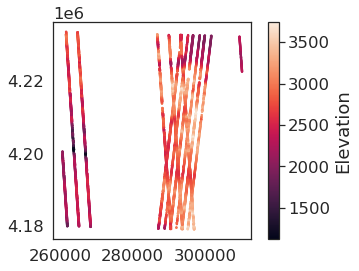

In [17]:
summer_2020_gdf.plot(column='h_te_median', s=2, legend=True, legend_kwds={'label': "Elevation", 'orientation': "vertical"});

In [18]:
# atl08 =  gpd.GeoDataFrame()

# for file in files:
#     atl08 =+ gpd.GeoDataFrame(open_atl08(file), crs='epsg:32611', geometry=globals()[f'gdf{file[20:22]}_{file[10:14]}'].geometry)
#     atl08['track'] = globals()[f'gdf{file[20:22]}_{file[10:14]}']

In [19]:
# atl08 =  gpd.GeoDataFrame()

# for file in files:
#     atl08 =+ open_atl08(file)
#     #atl08['track'] = globals()[f'gdf{file[20:22]}_{file[10:14]}']

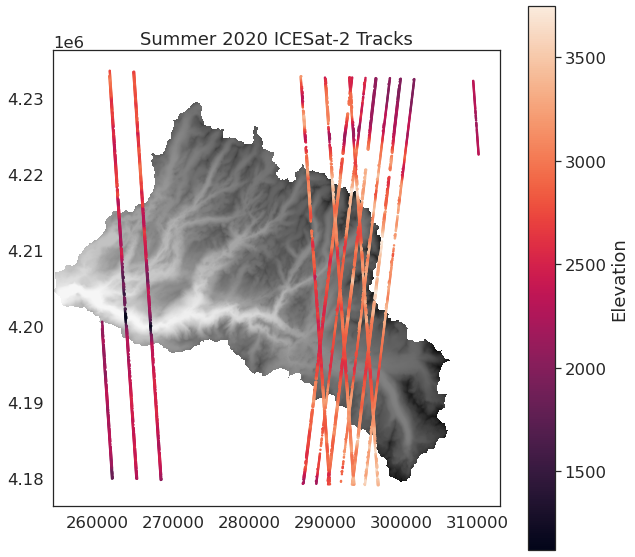

In [20]:
f, ax = plt.subplots(figsize = (10,10))
plt.title('Summer 2020 ICESat-2 Tracks')
im = ax.imshow(dem_9m_arr, cmap='Greys', extent=[xmin_9m,xmax_9m,ymin_9m,ymax_9m])
summer_2020_gdf.plot(column='h_te_median', ax=ax, s=2, legend=True, legend_kwds={'label': "Elevation", 'orientation': "vertical"});

In [21]:
# f, ax = plt.subplots(figsize = (10,10))
# plt.title('Summer 2020 ICESat-2 Tracks')
# im = ax.imshow(dem_9m, cmap='Greys', extent=[xmin,xmax,ymin,ymax])
# for track in tracks:
#     track.plot(ax=ax, markersize=0.1)

# Mask with ASO Roughness

In [67]:
dtm_fns = glob.glob('data/**/*.tif',recursive=True)
dtm_fns

['data/ASO_3m_dtm_USCATM__gdaldem_slope.tif',
 'data/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_gdaldem_tri.tif',
 'data/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_9m.tif',
 'data/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_gdaldem_rough.tif',
 'data/ASO_3m_dtm_USCATM__gdaldem_slope_9m.tif',
 'data/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL.tif']

In [68]:
dtm_fn = dtm_fns[0] # change which of the three tif files to look at
imgdir = 'data/'

In [69]:
src = rio.open(dtm_fn)
tm = src.read()

In [70]:
tm[tm == (-9999.)] = np.nan
tm[tm == 0] = np.nan

In [71]:
import numpy.ma as ma
#https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_where.html#numpy.ma.masked_where
tm_max_mask = ma.masked_where(tm > 6, tm) #Mask to remove values above a ceratin value

In [72]:
tm_max_mask

masked_array(
  data=[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],
  mask=[[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]],
  fill_value=1e+20,
  dtype=float32)

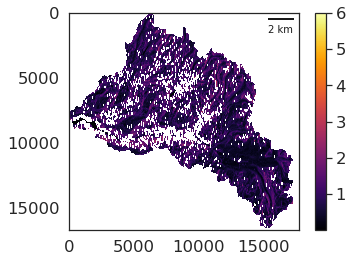

In [27]:
#Plot full range
f,ax = plt.subplots()
plt.imshow(tm_max_mask.squeeze(), cmap='inferno')
plt.colorbar()
ax.add_artist(ScaleBar(1));

In [29]:
#summer_2020_gdf_clipped = gpd.clip(summer_2020_gdf, tm_max_mask, keep_geom_type=False)

In [ ]:
type(tm_max_mask)

In [ ]:
tm_max_mask.gpd.GeoDataFrame()

# Masking with David's code

In [13]:
fn = os.path.join("data",
                       "ASO_3m_dtm_USCATM__gdaldem_slope_9m.tif")
# out_fn = os.path.join('data',
#                      'ASO_3m_dtm_USCATM__gdaldem_slope_9m_output.tif')
tuol_basin_fn = os.path.join('data',
                             'UpperTuolRiverBasin',
                            'UpperTuolRiverBasinOutline.shp')

In [14]:
tuol_basin = gpd.read_file(tuol_basin_fn)

<AxesSubplot:>

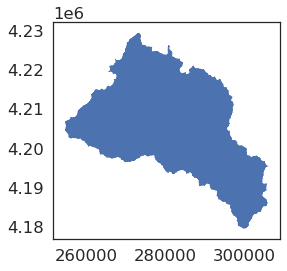

In [108]:
tuol_basin.plot()

In [7]:
#!gdaladdo -r gauss $slope_9m_path

0...10...20...30...40...50...60...70...80...90...100 - done.


In [37]:
dem_9m_path

'data/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_9m.tif'

In [38]:
# aso_feat_list = []
# ovr_scale = 8
# for fn in aso_fn_list:
#     src = rio.open(fn)
#     a = src.read(1, masked=True, out_shape=(src.count, int(src.height / ovr_scale), int(src.width / ovr_scale)))
#     ovr_transform = src.transform * src.transform.scale(src.width / a.shape[-1], src.height / a.shape[-2])
#     mask = np.ma.getmaskarray(a).astype(np.uint8) - 1
#     shapes = features.shapes(mask, mask=mask, transform=ovr_transform)
#     geom_list = list(shapes)
#     dt = os.path.splitext(os.path.split(fn)[-1])[0].split('_')[-1]
#     aso_feat_list.extend([{'properties':{'fn':fn, 'date':dt}, 'geometry':i[0]} for i in geom_list])

    
# aso_gdf = gpd.GeoDataFrame.from_features(aso_feat_list, crs=src.crs)
# #remove tiny polygons
# area_thresh = 1e8
# aso_gdf = aso_gdf.loc[aso_gdf.area > area_thresh]
# #Shoud simplify and sieve

In [15]:
aso_feat_list = []
ovr_scale = 8
src = rio.open(fn)
a = src.read(1, masked=True, out_shape=(src.count, int(src.height / ovr_scale), int(src.width / ovr_scale)))
ovr_transform = src.transform * src.transform.scale(src.width / a.shape[-1], src.height / a.shape[-2])
b = ma.masked_where(a > 20, a)
mask = np.ma.getmaskarray(b).astype(np.uint8) - 1
shapes = features.shapes(mask, mask=mask, transform=ovr_transform)
geom_list = list(shapes)
dt = os.path.splitext(os.path.split(fn)[-1])[0].split('_')[-1]
aso_feat_list.extend([{'properties':{'fn':fn, 'date':dt}, 'geometry':i[0]} for i in geom_list])
aso_gdf = gpd.GeoDataFrame.from_features(aso_feat_list, crs=src.crs)
#remove tiny polygons
area_thresh = 1e8
aso_gdf = aso_gdf.loc[aso_gdf.area > area_thresh]
#Shoud simplify and sieve

In [79]:
#geom_list

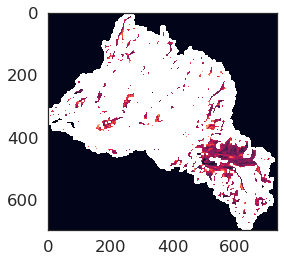

In [80]:
plt.imshow(b)

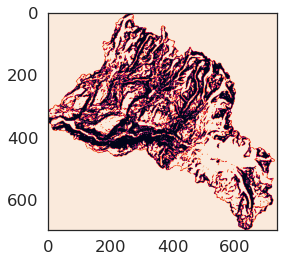

In [81]:
plt.imshow(mask)

In [82]:
aso_gdf

geometry  \
1079  POLYGON ((254247.000 4229667.000, 254247.000 4...   
1722  POLYGON ((273336.708 4229667.000, 273336.708 4...   

                                                fn date  
1079  data/ASO_3m_dtm_USCATM__gdaldem_slope_9m.tif   9m  
1722  data/ASO_3m_dtm_USCATM__gdaldem_slope_9m.tif   9m

<AxesSubplot:>

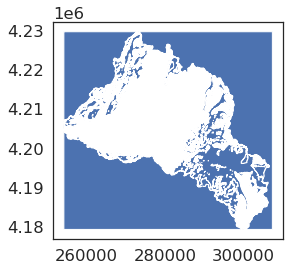

In [83]:
aso_gdf.plot()

In [16]:
summer_2020_gdf_clipped = gpd.clip(summer_2020_gdf, aso_gdf, keep_geom_type=False)

In [17]:
summer_2020_gdf_clipped = gpd.clip(summer_2020_gdf_clipped, tuol_basin, keep_geom_type=False)

<AxesSubplot:>

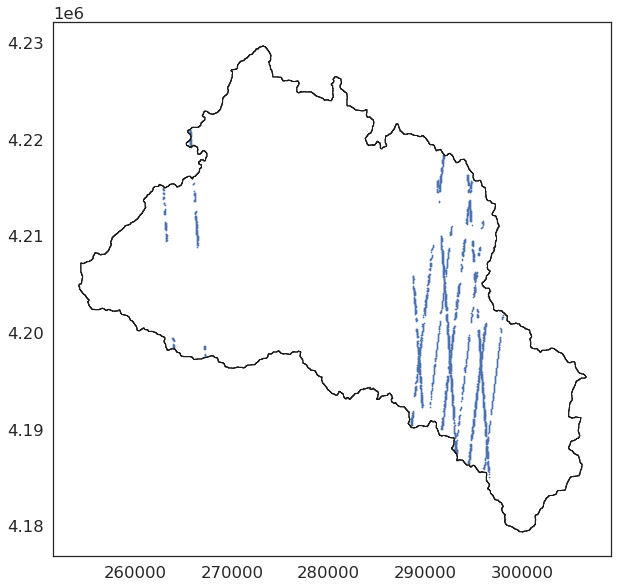

In [86]:
f, ax = plt.subplots(figsize=(10,10))
summer_2020_gdf_clipped.plot(ax=ax, markersize=0.5)
tuol_basin.plot(ax=ax, facecolor='none', edgecolor='k')

In [18]:
summer_2020_gdf_clipped['geometry']

129     POINT (291919.082 4218235.509)
130     POINT (291906.501 4218136.280)
131     POINT (291895.248 4218036.593)
132     POINT (291881.998 4217937.382)
133     POINT (291869.406 4217837.729)
                     ...              
9399    POINT (291706.343 4190488.170)
9400    POINT (291695.081 4190388.486)
9401    POINT (291683.158 4190289.242)
9402    POINT (291660.632 4190089.875)
9403    POINT (291650.041 4189990.174)
Name: geometry, Length: 2575, dtype: geometry

# Differencing ASO and ICSat-2

In [19]:
summer_2020_buffered = summer_2020_gdf_clipped.copy()
summer_2020_buffered['geometry'] = summer_2020_gdf_clipped.buffer(50)

In [20]:
summer_2020_buffered = summer_2020_buffered.dropna(0)

In [21]:
aso_elev = os.path.join('data',
                     'mcc_dem_3p0m_agg_TUOtrimmed_MANUAL.tif')
aso_slope = os.path.join('data',
                     'ASO_3m_dtm_USCATM__gdaldem_slope_9m.tif')

In [22]:
slope_aso = zonal_stats(summer_2020_buffered, aso_slope, geojson_out=True, nodata=(-9999.),stats='median')

In [24]:
h_aso = zonal_stats(summer_2020_buffered, aso_elev, geojson_out=True, nodata=(-9999.),stats='median')

In [27]:
h_aso

[{'id': '129',
  'type': 'Feature',
  'properties': {'Track': 'gdf3l_0805',
   'Unnamed: 0': 129,
   'dem_h': 3236.311279296875,
   'h_te_max': 3223.79443359375,
   'h_te_mean': 3218.71435546875,
   'h_te_median': 3219.14892578125,
   'h_te_min': 3214.2138671875,
   'h_te_mode': 3219.199951171875,
   'h_te_skew': 0.07975131273269652,
   'h_te_uncertainty': 14.4987154006958,
   'latitude': 38.087982177734375,
   'longitude': -119.37268829345705,
   'n_te_photons': 222.0,
   'segment_snowcover': 1.0,
   'terrain_slope': -0.07056297361850739,
   'x': 291919.0820379773,
   'y': 4218235.5086603435,
   'median': 3219.857421875},
  'geometry': {'type': 'Polygon',
   'coordinates': (((291969.0820379773, 4218235.5086603435),
     (291968.8412743109, 4218230.607803327),
     (291968.12130199745, 4218225.754144243),
     (291966.9290547639, 4218220.9944264805),
     (291965.27601460286, 4218216.374488725),
     (291963.17810119473, 4218211.9388235025),
     (291960.6555185924, 4218207.730148693),

In [25]:
slope_properties = [i['properties'] for i in slope_aso if 'properties' in i]
median_slope = [i['median'] for i in slope_properties if 'median' in i]

In [30]:
len(summer_2020_gdf_clipped['geometry'])

2575

In [31]:
len(summer_2020_final['geometry']) 

2575

In [34]:
summer_2020_final = gpd.GeoDataFrame.from_features(h_aso)
summer_2020_final['geometry'] = gpd.points_from_xy(summer_2020_gdf_clipped.x, summer_2020_gdf_clipped.y)
summer_2020_final['slope_aso'] = median_slope
summer_2020_final = summer_2020_final.rename(columns={"median": "h_aso"})
summer_2020_final[summer_2020_final == (0.)] = np.nan
summer_2020_final.head()

geometry       Track  Unnamed: 0        dem_h  \
0  POINT (291919.082 4218235.509)  gdf3l_0805         129  3236.311279   
1  POINT (291906.501 4218136.280)  gdf3l_0805         130  3233.483398   
2  POINT (291895.248 4218036.593)  gdf3l_0805         131  3221.446533   
3  POINT (291881.998 4217937.382)  gdf3l_0805         132  3206.359863   
4  POINT (291869.406 4217837.729)  gdf3l_0805         133  3188.683105   

      h_te_max    h_te_mean  h_te_median     h_te_min    h_te_mode  h_te_skew  \
0  3223.794434  3218.714355  3219.148926  3214.213867  3219.199951   0.079751   
1  3214.471436  3207.848633  3205.720459  3202.482422  3211.300049   0.284360   
2  3202.904297  3201.590088  3202.081055  3195.596191  3202.100098  -2.470910   
3  3196.205322  3186.147705  3186.958740  3176.294434  3187.300049  -0.121724   
4  3176.509521  3167.832520  3167.701660  3160.042725  3167.600098   0.107222   

   h_te_uncertainty   latitude   longitude  n_te_photons  segment_snowcover  \
0         14.498715  38.087982 -119.372688         222.0                1.0   
1         14.257124  38.087086 -119.372803         225.0                1.0   
2         14.822178  38.086185 -119.372902         216.0                1.0   
3         22.126060  38.085289 -119.373024         144.0                1.0   
4         14.016976  38.084389 -119.373138         226.0                1.0   

   terrain_slope              x             y        h_aso  slope_aso  
0      -0.070563  291919.082038  4.218236e+06  3219.857422  11.659740  
1      -0.132471  291906.501415  4.218136e+06  3206.580078   8.330848  
2      -0.030500  291895.248165  4.218037e+06  3202.897461   8.220202  
3      -0.182500  291881.997966  4.217937e+06  3188.548828  12.810504  
4      -0.168150  291869.405945  4.217838e+06  3168.094971  10.996469

In [178]:
# slope_aso = zonal_stats(summer_2020_buffered.geometry, aso_slope, geojson_out=True, nodata=(-9999.),stats='mean')
# summer_2020_final['slope_aso'] = slope_aso[{'mean'}]
# summer_2020_final = summer_2020_final.rename(columns={"mean": "slope_aso"})

In [35]:
summer_2020_final['difference'] = summer_2020_final['h_te_median'] - summer_2020_final['h_aso']

In [36]:
summer_2020_final[summer_2020_final['difference'] < (-250)] = np.nan
summer_2020_final[summer_2020_final['difference'] > (250)] = np.nan

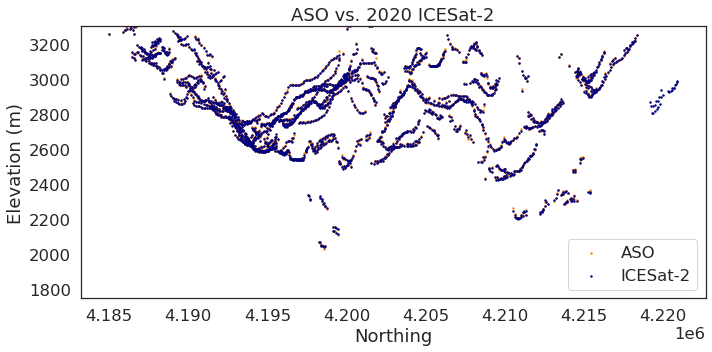

In [150]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(summer_2020_final['y'],summer_2020_final['h_aso'], c='darkorange', s=2, label = 'ASO')
ax.scatter(summer_2020_final['y'],summer_2020_final['h_te_median'], c='navy', s=2, label = 'ICESat-2')
ax.set_ylim(1750, 3300)
ax.set_xlabel('Northing')
ax.set_ylabel('Elevation (m)')
ax.set_title('ASO vs. 2020 ICESat-2')
ax.legend(loc = 'lower right')
fig.tight_layout()
plt.savefig('2020_dif_ASO_profile.jpeg', dpi=300)
#ax.set_xlim(4.196*(10**6),4.215*(10**6))

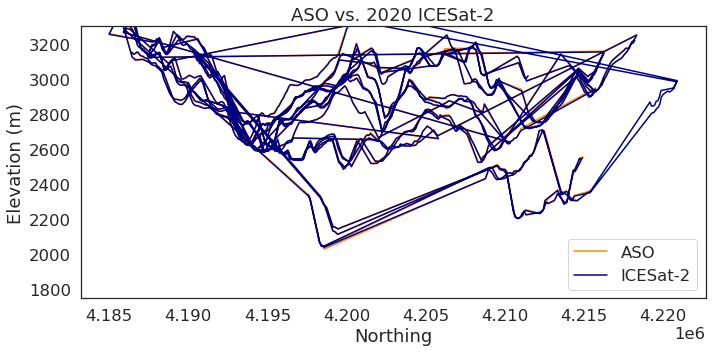

In [185]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(summer_2020_final['y'],summer_2020_final['h_aso'], c='darkorange', label = 'ASO')
ax.plot(summer_2020_final['y'],summer_2020_final['h_te_median'], c='navy', label = 'ICESat-2')
ax.set_ylim(1750, 3300)
ax.set_xlabel('Northing')
ax.set_ylabel('Elevation (m)')
ax.set_title('ASO vs. 2020 ICESat-2')
ax.legend(loc = 'lower right')
fig.tight_layout()
plt.savefig('2020_dif_ASO_profile.jpeg', dpi=300)
#ax.set_xlim(4.196*(10**6),4.215*(10**6))

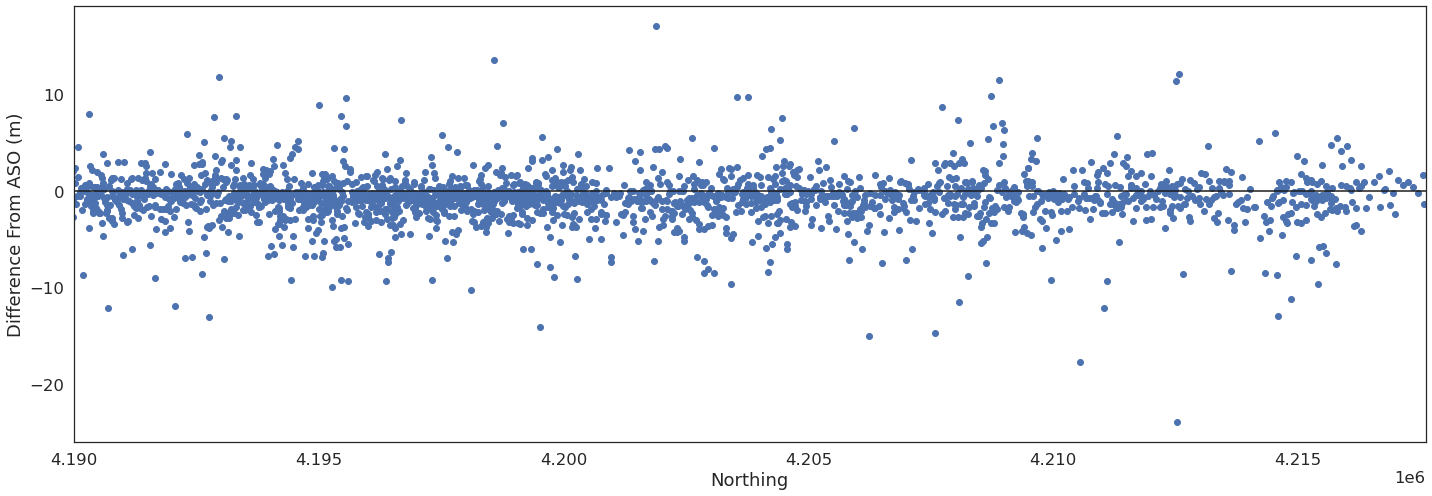

In [43]:
fig, ax = plt.subplots(figsize=(20,7))
ax.scatter(summer_2020_final['y'],summer_2020_final['difference'], cmap=summer_2020_final['slope_aso'])
ax.axhline(y=0, c='k')
plt.xlim( 4.19e+06, 4.2176e+06)
#plt.ylim(-6, 3)
plt.xlabel('Northing')
plt.ylabel('Difference From ASO (m)')
plt.tight_layout()
plt.savefig('2020_Dif.jpeg', dpi=300)

In [37]:
summer_2020_difference = pd.DataFrame(summer_2020_final)
summer_2020_difference.to_csv('summer_2020_difference.csv')